# Final Project for AI 221

AI 221 | 1st Sem AY 2024-2025  
Students: Jemima Bian Anila, Joshua Cantor, Michael Spencer Quinto, MEng in AI  
Instructors: Dr. Miguel Remolona | Dr. Jon Dewitt Dalisay

## Dataset

https://data.mendeley.com/datasets/tsvdyhbphs/1

https://www.kaggle.com/datasets/jaydepaolomirandilla/philippine-medicinal-plant-leaf-dataset/data


In [21]:
import sys
from pathlib import Path
  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import torch  
import cv2
import random



%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Add project root directory to Python path to allow importing from src folder
notebook_dir = Path("__file__").resolve().parent
project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [4]:
print(torch.cuda.is_available())

True


# Import utility modules from `src` folder

Note: all reusable code like transformations for the dataframes, etc. can be found inside the `src` folder and are imported here for better modularity and version control


In [33]:
from src.utils_nn import SampleNN, test_function
from src.utils_image_conversion import (
    PROCESSED_DATA_FOLDER,
    HIBISCUS_PROCESSED_FOLDER,
    CARMONA_RETUSA_PROCESSED_FOLDER,
    AVERRHOEA_BILIMBI_PROCESSED_FOLDER,
)
from src.utils_preprocessing import detect_edges_and_lines

In [9]:
print(PROCESSED_DATA_FOLDER.relative_to(project_root))
print(HIBISCUS_PROCESSED_FOLDER.relative_to(project_root))

data/ph_med_plants_reduced_sizes
data/ph_med_plants_reduced_sizes/1Hibiscus rosa-sinensis(HRS)


# 1. Exploratory Data Analysis


## 1.1 Data Loading and Inspection


In [16]:
# Get list of files in HIBISCUS_PROCESSED_FOLDER
hibiscus_files = list(HIBISCUS_PROCESSED_FOLDER.glob("*.webp"))
hibiscus_files_names = [file.name for file in hibiscus_files]
print(hibiscus_files_names)

['Class1_19.webp', 'Class1_93.webp', 'Class1_3.webp', 'Class1_37.webp', 'Class1_80.webp', 'Class1_17.webp', 'Class1_23.webp', 'Class1_22.webp', 'Class1_25.webp', 'Class1_39.webp', 'Class1_33.webp', 'Class1_95.webp', 'Class1_16.webp', 'Class1_115.webp', 'Class1_49.webp', 'Class1_32.webp', 'Class1_110.webp', 'Class1_108.webp', 'Class1_84.webp', 'Class1_111.webp', 'Class1_116.webp', 'Class1_7.webp', 'Class1_77.webp', 'Class1_69.webp', 'Class1_73.webp', 'Class1_89.webp', 'Class1_63.webp', 'Class1_58.webp', 'Class1_105.webp', 'Class1_18.webp', 'Class1_75.webp', 'Class1_106.webp', 'Class1_112.webp', 'Class1_27.webp', 'Class1_11.webp', 'Class1_52.webp', 'Class1_34.webp', 'Class1_104.webp', 'Class1_35.webp', 'Class1_65.webp', 'Class1_102.webp', 'Class1_76.webp', 'Class1_97.webp', 'Class1_44.webp', 'Class1_72.webp', 'Class1_1.webp', 'Class1_42.webp', 'Class1_38.webp', 'Class1_28.webp', 'Class1_6.webp', 'Class1_30.webp', 'Class1_62.webp', 'Class1_81.webp', 'Class1_96.webp', 'Class1_114.webp', 'C

## 9 Random Hibiscus Images


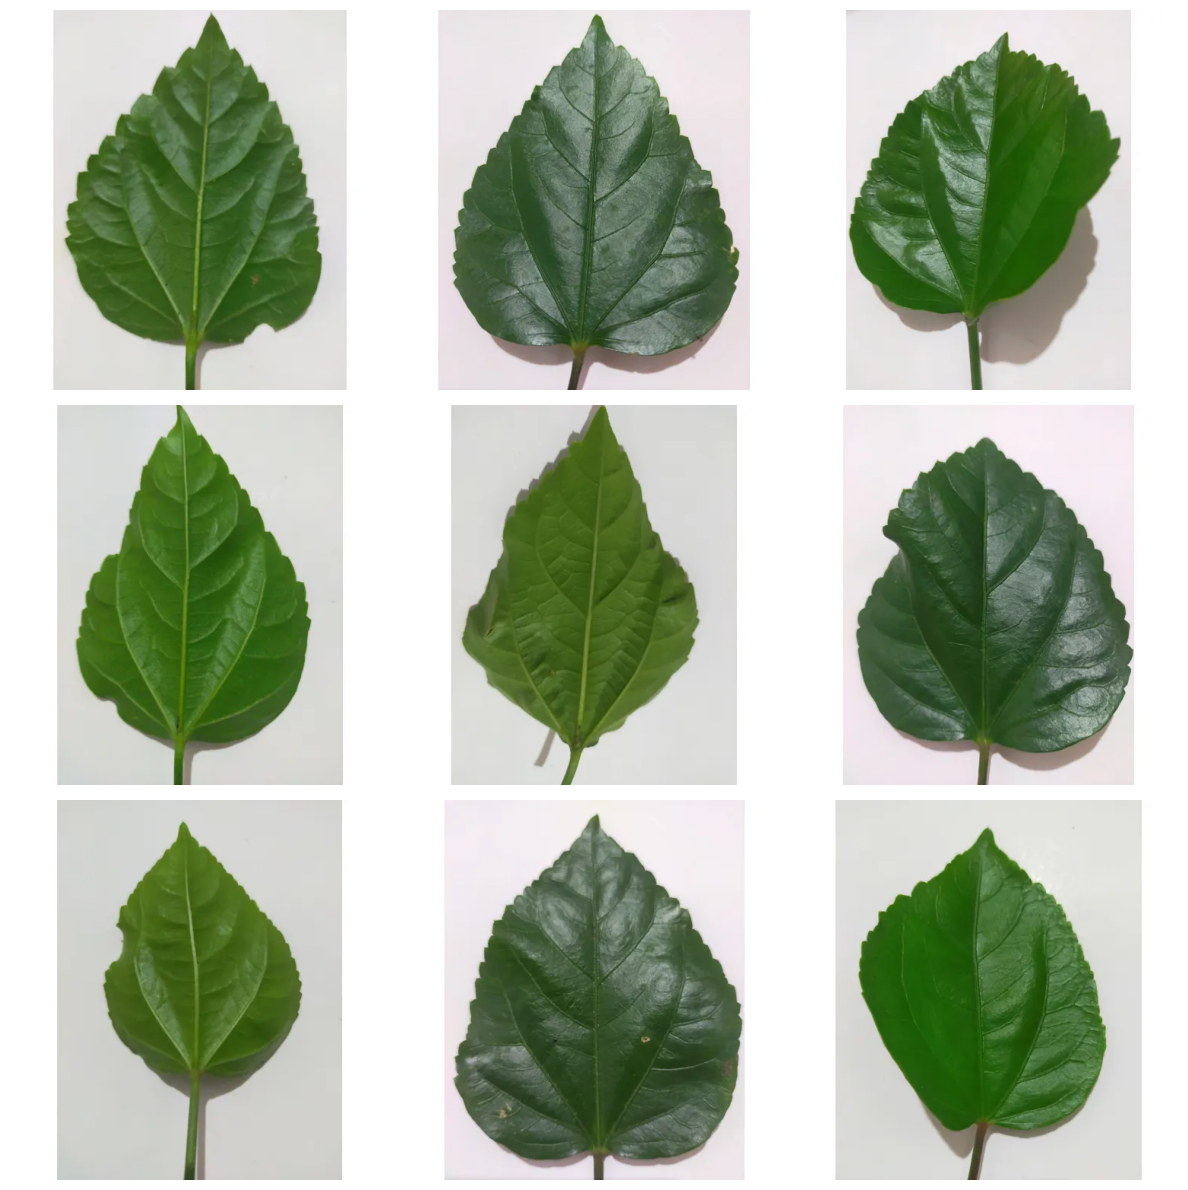

In [20]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Randomly sample 9 images
random_images = random.sample(hibiscus_files, 9)

# Plot each image
for idx, ax in enumerate(axes.flat):
    img = plt.imread(random_images[idx])
    ax.imshow(img)
    ax.axis("off")

# Adjust layout and display
plt.tight_layout()
plt.show()

## 9 random averrhoea bilimbi images


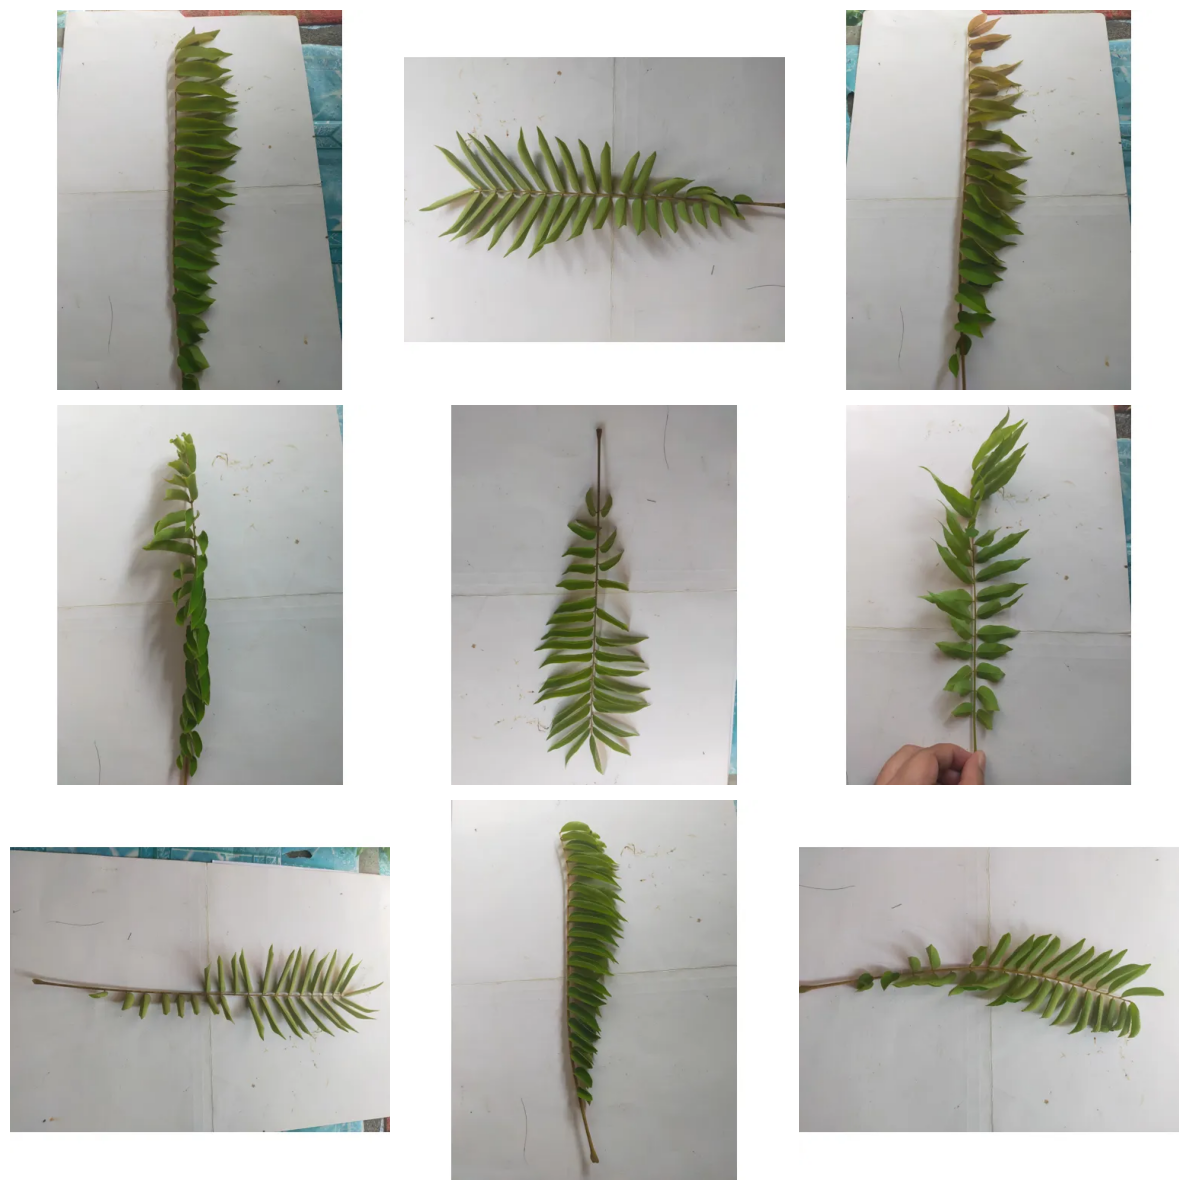

In [24]:
averrhoea_bilimbi_files = list(AVERRHOEA_BILIMBI_PROCESSED_FOLDER.glob("*.webp"))

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Randomly sample 9 images
random_images = random.sample(averrhoea_bilimbi_files, 9)

# Plot each image
for idx, ax in enumerate(axes.flat):
    img = plt.imread(random_images[idx])
    ax.imshow(img)
    ax.axis("off")

# Adjust layout and display
plt.tight_layout()
plt.show()

## Sample Image Processing


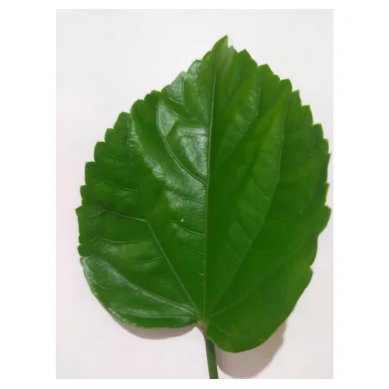

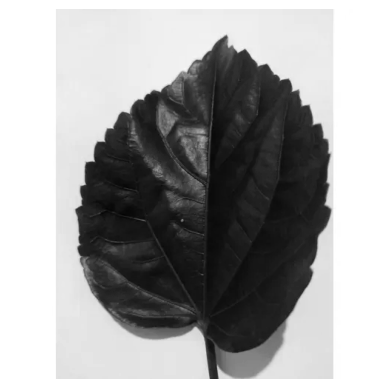

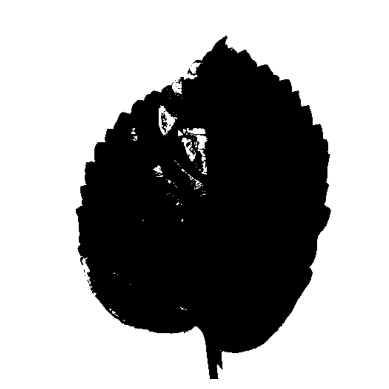

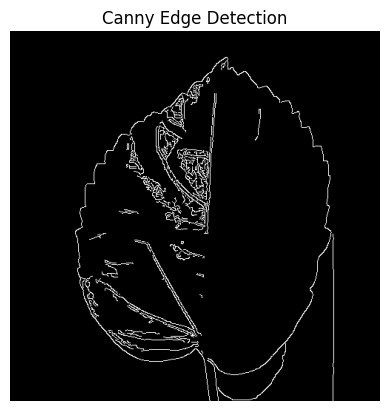

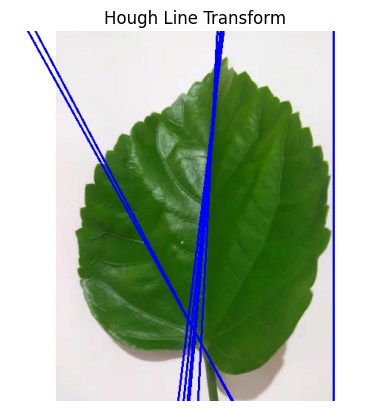

In [34]:
hibiscus_random = hibiscus_files[1]
sample_image = plt.imread(hibiscus_random)
plt.imshow(sample_image)
plt.axis("off")
plt.show()

# Convert to grayscale and display
sample_img_gray = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(sample_img_gray, cmap="gray")
plt.axis("off")
plt.show()

# Apply thresholding and display
_, sample_img_thresh = cv2.threshold(sample_img_gray, 127, 255, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(sample_img_thresh, cmap="gray")
plt.axis("off")
plt.show()


edges, line_image = detect_edges_and_lines(sample_image)